# Recreating the Figure from Rong, Frey et al. 2024 about CRISPRi

In [330]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [426]:
A_DATA_FILE = "figure_2a.csv"
B_DATA_FILE = "figure_2b.csv"
C_DATA_FILE = "figure_2c.csv"
D_DATA_FILE = "figure_2d.csv"

CONDITION_LIST = ["induced", "uninduced"]
C_VAR_LIST = ["10 mM glucose", "25 mM acetate", "10 mM glucose + 25 mM acetate"]
D_VAR_LIST = ["Acetate (mM)", "IBA (mM)", "Glucose (mM)", "IBA strain - OD600"]

AB_COLORS = ["#5884deff", "#bde7ffff"]
C_COLORS = ["#bdbdbdff", "#585858ff", "#ebc667ff"]
D_COLORS = ["#fe9256ff", "#bdbdbdff", "#ebc663ff", "#000000ff"]

## 1. Figure 2A

### 1.1 Transform The Data

In [65]:
a_data = pd.read_csv(A_DATA_FILE)
a_data = a_data.melt(id_vars="time (h)", var_name="rep_cond", value_name="od_600")
a_data[["replicate", "condition"]] = a_data["rep_cond"].str.split("_", n=1, expand=True)
a_data["replicate"] = a_data["replicate"].str[-1].astype(int)
a_data["condition"] = pd.Categorical(
    a_data["condition"], categories=CONDITION_LIST, ordered=True
)

### 1.2 Plot the Dat

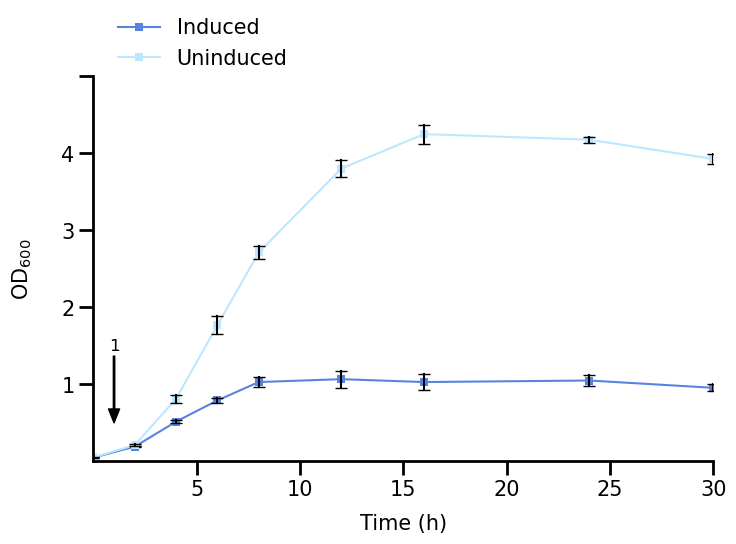

In [351]:
fig, ax = plt.subplots(figsize=(8, 5))

# main plot
p = sns.lineplot(
    a_data,
    x="time (h)",
    y="od_600",
    hue="condition",
    errorbar="sd",
    err_style="bars",
    err_kws={"capsize": 4, "ecolor": "black"},
    markers=True,
    marker="s",
    markeredgewidth=0,
    palette=AB_COLORS,
    ax=ax,
)
# restrict plotting area
ax.set_xlim(0, 30)
ax.set_ylim(0, 5)

# define frequency and size of ticks and their labels
ax.set_xticks(range(5, 31, 5), range(5, 31, 5), fontsize=15)
ax.xaxis.set_tick_params(width=2, length=10)
ax.set_yticks(range(1, 6, 1), [1, 2, 3, 4, ""], fontsize=15)
ax.yaxis.set_tick_params(width=2, length=10)

# adjust the "frame" of the plot
for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
    ax.spines[pos].set_linewidth(lw)

# set the legend
handles, labels = p.get_legend_handles_labels()
ax.legend(
    handles,
    ["Induced", "Uninduced"],
    title=None,
    loc="upper left",
    bbox_to_anchor=[0.01, 1.2],
    frameon=False,
    fontsize=15,
)

# make an annotation with arrow to point to timepoint at 1 hour
ax.annotate(
    "1",
    (1, 0.5),
    xytext=(1, 1.5),
    fontsize=12,
    xycoords="data",
    horizontalalignment="center",
    verticalalignment="center",
    arrowprops={
        "width": 1,
        "headwidth": 8,
        "headlength": 10,
        "color": "black",
    },
)

# set the axis labels
ax.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
ax.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

## 2. Figure 2B

### 2.1 Transform The Data

In [224]:
b_data = pd.read_csv(B_DATA_FILE)
b_data = b_data.melt(id_vars="timepoint (h)", var_name="rep_cond", value_name="yield")
b_data[["condition", "replicate"]] = (
    b_data["rep_cond"].str.lower().str.split("_", n=1, expand=True)
)
b_data["replicate"] = b_data["replicate"].str[-1].astype(int)
b_data["condition"] = pd.Categorical(
    b_data["condition"], categories=CONDITION_LIST, ordered=True
)

data_list = []
for _bin, _label in zip([(2, 12), (16,), (30,)], ["2-12", "12-16", "16-30"]):
    df = b_data[b_data["timepoint (h)"].isin(_bin)].copy()
    df["time_interval"] = _label
    data_list.append(df)

b_data = pd.concat(data_list)

### 2.2 Plot The Data

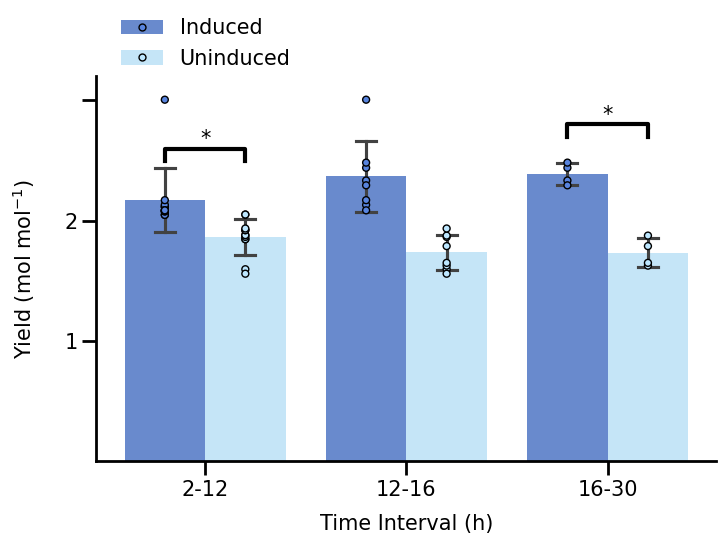

In [352]:
fig, ax = plt.subplots(figsize=(8, 5))

TOTAL_WIDTH = 0.8
bp = sns.barplot(
    b_data,
    x="time_interval",
    y="yield",
    hue="condition",
    errorbar="sd",
    palette=AB_COLORS,
    capsize=0.2,
    width=TOTAL_WIDTH,
    ax=ax,
)
sns.stripplot(
    b_data,
    x="time_interval",
    y="yield",
    hue="condition",
    edgecolor="black",
    linewidth=1,
    dodge=True,
    jitter=0,
    palette=AB_COLORS,
    ax=ax,
)

# restrict plotting area
ax.set_ylim(0, 3.2)

# define frequency and size of ticks and their labels
ax.xaxis.set_tick_params(width=2, length=10, labelsize=15)
ax.set_yticks(range(1, 4, 1), [1, 2, ""], fontsize=15)
ax.yaxis.set_tick_params(width=2, length=10)

# adjust the "frame" of the plot
for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
    ax.spines[pos].set_linewidth(lw)

# set the legend
handles, labels = ax.get_legend_handles_labels()
n_hues = len(CONDITION_LIST)
new_handles = [(handles[i], handles[i + n_hues]) for i in range(n_hues)]
ax.legend_.remove()
ax.legend(
    new_handles,
    ["Induced", "Uninduced"],
    title=None,
    loc="upper left",
    bbox_to_anchor=[0.01, 1.2],
    frameon=False,
    fontsize=15,
)

# set the axis labels
ax.set_xlabel("Time Interval (h)", labelpad=10, fontdict={"size": 15})
ax.set_ylabel(
    "Yield $\\left( \\text{mol } \\text{mol}^{-1} \\right)$",
    labelpad=20,
    fontdict={"size": 15},
)

# indicate statistical significances
bar_center = TOTAL_WIDTH / 4
sig_height = 0.1
for bar_idx, y_start in zip([0, 2], [2.5, 2.7]):
    x_left = bar_idx - bar_center
    x_right = bar_idx + bar_center
    ax.plot(
        [x_left, x_left, x_right, x_right],
        [y_start, y_start + sig_height, y_start + sig_height, y_start],
        linewidth=3,
        color="black",
    )
    ax.text(
        (x_left + x_right) / 2,
        y_start + sig_height,
        "*",
        horizontalalignment="center",
        verticalalignment="bottom",
        fontsize=15,
    )

The significance annotation is based on
[this StackOverflow answer](https://stackoverflow.com/questions/11517986/indicating-the-statistically-significant-difference-in-bar-graph).

## 3. Figure 2C

### 3.1 Transform The Data

In [356]:
c_data = pd.read_csv(C_DATA_FILE, header=[0, 1], index_col=0)
c_data.columns.names = ["variable", "measurement"]
c_data.index.name = "time (h)"
c_data = c_data.stack(level="variable", future_stack=True).reset_index()
c_data["variable"] = pd.Categorical(
    c_data["variable"], categories=C_VAR_LIST, ordered=True
)
c_data["od_lower"] = c_data["od600"] - c_data["stdev"]
c_data["od_upper"] = c_data["od600"] + c_data["stdev"]

### 3.2 Plot The Data

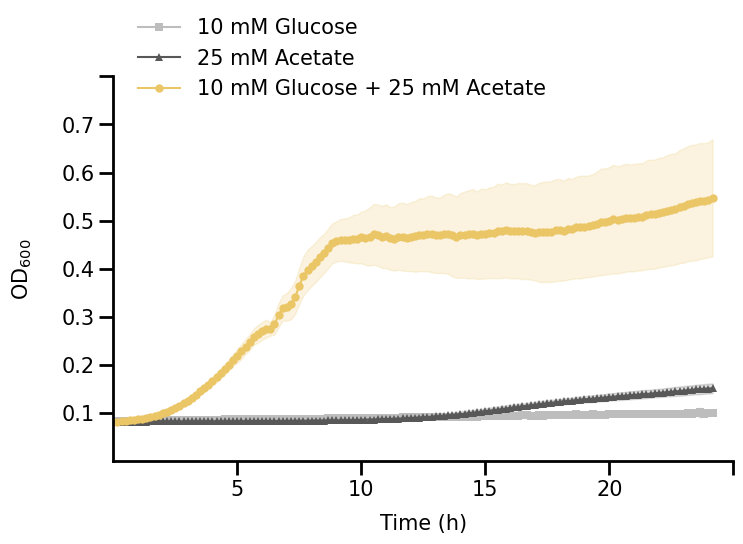

In [397]:
fig, ax = plt.subplots(figsize=(8, 5))

# main plot
p = sns.lineplot(
    c_data,
    x="time (h)",
    y="od600",
    hue="variable",
    style="variable",
    markers=["s", "^", "o"],
    markersize=6,
    markeredgewidth=0,
    errorbar=None,
    dashes={var: "" for var in C_VAR_LIST},
    palette=C_COLORS,
    ax=ax,
)

# plot the standard deviation as a shaded area
lower = sns.lineplot(
    c_data,
    x="time (h)",
    y="od_lower",
    hue="variable",
    errorbar=None,
    palette=C_COLORS,
    linewidth=0,
    ax=ax,
)
upper = sns.lineplot(
    c_data,
    x="time (h)",
    y="od_upper",
    hue="variable",
    errorbar=None,
    palette=C_COLORS,
    linewidth=0,
    ax=ax,
)
lines = p.get_lines()
for line_idx in range(3):
    ax.fill_between(
        lines[line_idx].get_xdata(),
        lines[line_idx + 6].get_ydata(),
        lines[line_idx + 6 * 2].get_ydata(),
        color=C_COLORS[line_idx],
        alpha=0.2,
    )

# restrict plotting area
ax.set_xlim(0, 25)
ax.set_ylim(0, 0.8)

# define frequency and size of ticks and their labels
ax.set_xticks(range(5, 26, 5), list(range(5, 26, 5))[:-1] + [""], fontsize=15)
ax.xaxis.set_tick_params(width=2, length=10)
y_tick_labels = np.round(np.linspace(0.1, 0.8, 8), 1)
ax.set_yticks(y_tick_labels, y_tick_labels.tolist()[:-1] + [""], fontsize=15)
ax.yaxis.set_tick_params(width=2, length=10)

# adjust the "frame" of the plot
for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
    ax.spines[pos].set_linewidth(lw)

# set the legend
handles, labels = p.get_legend_handles_labels()
ax.legend(
    handles,
    ["10 mM Glucose", "25 mM Acetate", "10 mM Glucose + 25 mM Acetate"],
    title=None,
    loc="upper left",
    bbox_to_anchor=[0.01, 1.2],
    frameon=False,
    fontsize=15,
)

# set the axis labels
ax.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
ax.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

## 4. Figure 2D

### 4.1 Transform The Data

In [413]:
d_data = pd.read_csv(D_DATA_FILE, header=[0, 1], index_col=0)
d_data.columns.names = ["variable", "replicate"]
d_data.index.name = "time (h)"
d_data = (
    d_data.stack(level="variable", future_stack=True)
    .reset_index()
    .dropna()
    .melt(id_vars=["time (h)", "variable"], var_name="replicate", value_name="conc_od")
)
d_data["variable"] = pd.Categorical(
    d_data["variable"], categories=D_VAR_LIST, ordered=True
)

### 4.2 Plot The Data

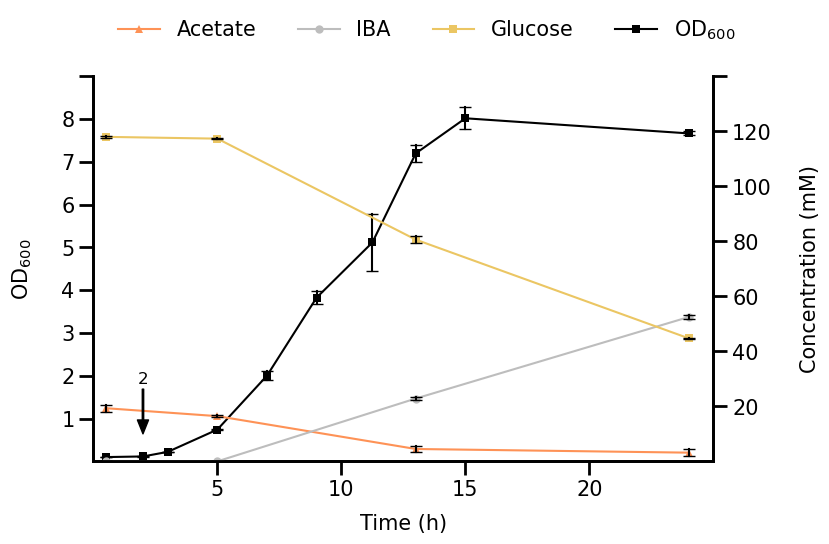

In [494]:
fig, ax1 = plt.subplots(figsize=(8, 5))

# first of variables with millimolar unit
p1 = sns.lineplot(
    d_data[(d_data["variable"].str.contains("OD")) & (d_data["time (h)"] <= 25)],
    x="time (h)",
    y="conc_od",
    hue="variable",
    errorbar="sd",
    err_style="bars",
    err_kws={"capsize": 4, "ecolor": "black"},
    markers=True,
    marker="s",
    markersize=6,
    markeredgewidth=0,
    palette=D_COLORS,
    ax=ax1,
)
ax1.set_xlim(0, 25)
ax1.set_ylim(0, 9)

# OD600 plot
ax2 = ax1.twinx()
p2 = sns.lineplot(
    d_data[~d_data["variable"].str.contains("OD")],
    x="time (h)",
    y="conc_od",
    hue="variable",
    errorbar="sd",
    err_style="bars",
    err_kws={"capsize": 4, "ecolor": "black"},
    style="variable",
    markers=["^", "o", "s", "s"],
    markersize=6,
    markeredgewidth=0,
    dashes={var: "" for var in D_VAR_LIST},
    palette=D_COLORS,
    ax=ax2,
)
ax2.set_ylim(0, 130)

# define frequency and size of ticks and their labels
ax1.set_xticks(range(5, 25, 5), range(5, 25, 5), fontsize=15)
ax1.xaxis.set_tick_params(width=2, length=10)
ax1.set_yticks(range(1, 10, 1), list(range(1, 10, 1))[:-1] + [""], fontsize=15)
ax1.yaxis.set_tick_params(width=2, length=10)
ax2.set_yticks(range(20, 141, 20), list(range(20, 141, 20))[:-1] + [""], fontsize=15)
ax2.yaxis.set_tick_params(width=2, length=10)

# adjust the "frame" of the plot
for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 2]):
    ax1.spines[pos].set_linewidth(lw)
    ax2.spines[pos].set_linewidth(lw)

# set the legend
handles1, labels1 = p1.get_legend_handles_labels()
handles2, labels2 = p2.get_legend_handles_labels()
ax2.legend_.remove()
ax1.legend(
    handles2 + [handles1[-1]],
    ["Acetate", "IBA", "Glucose", "$\\text{OD}_{600}$"],
    ncol=4,
    title=None,
    loc="upper left",
    bbox_to_anchor=[0.01, 1.2],
    frameon=False,
    fontsize=15,
)

# make an annotation with arrow to point to timepoint at 1 hour
ax2.annotate(
    "2",
    (2, 10),
    xytext=(2, 30),
    fontsize=12,
    xycoords="data",
    horizontalalignment="center",
    verticalalignment="center",
    arrowprops={
        "width": 1,
        "headwidth": 8,
        "headlength": 10,
        "color": "black",
    },
)

# set the axis labels
ax1.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
ax2.set_ylabel("Concentration (mM)", labelpad=20, fontdict={"size": 15})
ax1.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

## 5. Everything Together

> Alternatively, you could combine the four individual plots into one figure with subplots
> above (try if you want).

### 5.1 Define Functions for Each Individual Plot

In [476]:
def figure_a(a_data: pd.DataFrame, ax: plt.Axes):
    # main plot
    p = sns.lineplot(
        a_data,
        x="time (h)",
        y="od_600",
        hue="condition",
        errorbar="sd",
        err_style="bars",
        err_kws={"capsize": 4, "ecolor": "black"},
        markers=True,
        marker="s",
        markeredgewidth=0,
        palette=AB_COLORS,
        ax=ax,
    )
    # restrict plotting area
    ax.set_xlim(0, 30)
    ax.set_ylim(0, 5)

    # define frequency and size of ticks and their labels
    ax.set_xticks(range(5, 31, 5), range(5, 31, 5), fontsize=15)
    ax.xaxis.set_tick_params(width=2, length=10)
    ax.set_yticks(range(1, 6, 1), [1, 2, 3, 4, ""], fontsize=15)
    ax.yaxis.set_tick_params(width=2, length=10)

    # adjust the "frame" of the plot
    for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
        ax.spines[pos].set_linewidth(lw)

    # set the legend
    handles, labels = p.get_legend_handles_labels()
    ax.legend(
        handles,
        ["Induced", "Uninduced"],
        title=None,
        loc="upper left",
        bbox_to_anchor=[0.01, 1.2],
        frameon=False,
        fontsize=15,
    )

    # make an annotation with arrow to point to timepoint at 1 hour
    ax.annotate(
        "1",
        (1, 0.5),
        xytext=(1, 1.5),
        fontsize=12,
        xycoords="data",
        horizontalalignment="center",
        verticalalignment="center",
        arrowprops={
            "width": 1,
            "headwidth": 8,
            "headlength": 10,
            "color": "black",
        },
    )

    # set the axis labels
    ax.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
    ax.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

In [477]:
def figure_b(b_data: pd.DataFrame, ax: plt.Axes):
    total_width = 0.8
    ax = sns.barplot(
        b_data,
        x="time_interval",
        y="yield",
        hue="condition",
        errorbar="sd",
        palette=AB_COLORS,
        capsize=0.2,
        width=total_width,
        ax=ax,
    )
    sns.stripplot(
        b_data,
        x="time_interval",
        y="yield",
        hue="condition",
        edgecolor="black",
        linewidth=1,
        dodge=True,
        jitter=0,
        palette=AB_COLORS,
        ax=ax,
    )

    # restrict plotting area
    ax.set_ylim(0, 3.2)

    # define frequency and size of ticks and their labels
    ax.xaxis.set_tick_params(width=2, length=10, labelsize=15)
    ax.set_yticks(range(1, 4, 1), [1, 2, ""], fontsize=15)
    ax.yaxis.set_tick_params(width=2, length=10)

    # adjust the "frame" of the plot
    for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
        ax.spines[pos].set_linewidth(lw)

    # set the legend
    handles, labels = ax.get_legend_handles_labels()
    n_hues = len(CONDITION_LIST)
    new_handles = [(handles[i], handles[i + n_hues]) for i in range(n_hues)]
    ax.legend_.remove()
    ax.legend(
        new_handles,
        ["Induced", "Uninduced"],
        title=None,
        loc="upper left",
        bbox_to_anchor=[0.01, 1.2],
        frameon=False,
        fontsize=15,
    )

    # set the axis labels
    ax.set_xlabel("Time Interval (h)", labelpad=10, fontdict={"size": 15})
    ax.set_ylabel(
        "Yield $\\left( \\text{mol } \\text{mol}^{-1} \\right)$",
        labelpad=20,
        fontdict={"size": 15},
    )

    # indicate statistical significances
    bar_center = total_width / 4
    sig_height = 0.1
    for bar_idx, y_start in zip([0, 2], [2.5, 2.7]):
        x_left = bar_idx - bar_center
        x_right = bar_idx + bar_center
        ax.plot(
            [x_left, x_left, x_right, x_right],
            [y_start, y_start + sig_height, y_start + sig_height, y_start],
            linewidth=3,
            color="black",
        )
        ax.text(
            (x_left + x_right) / 2,
            y_start + sig_height,
            "*",
            horizontalalignment="center",
            verticalalignment="bottom",
            fontsize=15,
        )

In [478]:
def figure_c(c_data: pd.DataFrame, ax: plt.Axes):
    # main plot
    p = sns.lineplot(
        c_data,
        x="time (h)",
        y="od600",
        hue="variable",
        style="variable",
        markers=["s", "^", "o"],
        markersize=6,
        markeredgewidth=0,
        errorbar=None,
        dashes={var: "" for var in C_VAR_LIST},
        palette=C_COLORS,
        ax=ax,
    )

    # plot the standard deviation as a shaded area
    lower = sns.lineplot(
        c_data,
        x="time (h)",
        y="od_lower",
        hue="variable",
        errorbar=None,
        palette=C_COLORS,
        linewidth=0,
        ax=ax,
    )
    upper = sns.lineplot(
        c_data,
        x="time (h)",
        y="od_upper",
        hue="variable",
        errorbar=None,
        palette=C_COLORS,
        linewidth=0,
        ax=ax,
    )
    lines = p.get_lines()
    for line_idx in range(3):
        ax.fill_between(
            lines[line_idx].get_xdata(),
            lines[line_idx + 6].get_ydata(),
            lines[line_idx + 6 * 2].get_ydata(),
            color=C_COLORS[line_idx],
            alpha=0.2,
        )

    # restrict plotting area
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 0.8)

    # define frequency and size of ticks and their labels
    ax.set_xticks(range(5, 26, 5), list(range(5, 26, 5))[:-1] + [""], fontsize=15)
    ax.xaxis.set_tick_params(width=2, length=10)
    y_tick_labels = np.round(np.linspace(0.1, 0.8, 8), 1)
    ax.set_yticks(y_tick_labels, y_tick_labels.tolist()[:-1] + [""], fontsize=15)
    ax.yaxis.set_tick_params(width=2, length=10)

    # adjust the "frame" of the plot
    for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 0]):
        ax.spines[pos].set_linewidth(lw)

    # set the legend
    handles, labels = p.get_legend_handles_labels()
    ax.legend(
        handles,
        ["10 mM Glucose", "25 mM Acetate", "10 mM Glucose + 25 mM Acetate"],
        title=None,
        loc="upper left",
        bbox_to_anchor=[0.01, 1.2],
        frameon=False,
        fontsize=15,
    )

    # set the axis labels
    ax.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
    ax.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

In [495]:
def figure_d(d_data: pd.DataFrame, ax: plt.Axes):
    # first of variables with millimolar unit
    p1 = sns.lineplot(
        d_data[(d_data["variable"].str.contains("OD")) & (d_data["time (h)"] <= 25)],
        x="time (h)",
        y="conc_od",
        hue="variable",
        errorbar="sd",
        err_style="bars",
        err_kws={"capsize": 4, "ecolor": "black"},
        markers=True,
        marker="s",
        markersize=6,
        markeredgewidth=0,
        palette=D_COLORS,
        ax=ax,
    )
    ax.set_xlim(0, 25)
    ax.set_ylim(0, 9)

    # OD600 plot
    ax2 = ax.twinx()
    p2 = sns.lineplot(
        d_data[~d_data["variable"].str.contains("OD")],
        x="time (h)",
        y="conc_od",
        hue="variable",
        errorbar="sd",
        err_style="bars",
        err_kws={"capsize": 4, "ecolor": "black"},
        style="variable",
        markers=["^", "o", "s", "s"],
        markersize=6,
        markeredgewidth=0,
        dashes={var: "" for var in D_VAR_LIST},
        palette=D_COLORS,
        ax=ax2,
    )
    ax2.set_ylim(0, 130)

    # define frequency and size of ticks and their labels
    ax.set_xticks(range(5, 25, 5), range(5, 25, 5), fontsize=15)
    ax.xaxis.set_tick_params(width=2, length=10)
    ax.set_yticks(range(1, 10, 1), list(range(1, 10, 1))[:-1] + [""], fontsize=15)
    ax.yaxis.set_tick_params(width=2, length=10)
    ax2.set_yticks(
        range(20, 141, 20), list(range(20, 141, 20))[:-1] + [""], fontsize=15
    )
    ax2.yaxis.set_tick_params(width=2, length=10)

    # adjust the "frame" of the plot
    for pos, lw in zip(["bottom", "left", "top", "right"], [2, 2, 0, 2]):
        ax.spines[pos].set_linewidth(lw)
        ax2.spines[pos].set_linewidth(lw)

    # set the legend
    _handles1, _ = p1.get_legend_handles_labels()
    _handles2, _ = p2.get_legend_handles_labels()
    ax2.legend_.remove()
    ax.legend(
        _handles2 + [_handles1[-1]],
        ["Acetate", "IBA", "Glucose", "$\\text{OD}_{600}$"],
        ncol=4,
        title=None,
        loc="upper left",
        bbox_to_anchor=[0.01, 1.2],
        frameon=False,
        fontsize=8,
    )

    # make an annotation with arrow to point to timepoint at 1 hour
    ax2.annotate(
        "2",
        (2, 10),
        xytext=(2, 30),
        fontsize=12,
        xycoords="data",
        horizontalalignment="center",
        verticalalignment="center",
        arrowprops={
            "width": 1,
            "headwidth": 8,
            "headlength": 10,
            "color": "black",
        },
    )

    # set the axis labels
    ax.set_xlabel("Time (h)", labelpad=10, fontdict={"size": 15})
    ax2.set_ylabel("Concentration (mM)", labelpad=20, fontdict={"size": 15})
    ax.set_ylabel("$\\text{OD}_{600}$", labelpad=20, fontdict={"size": 15})

### 5.2 Combine All Subplots
- set the figure size to the maximum allowd in Nature Communications.
- should probably be smaller
- text elements need to be adjusted

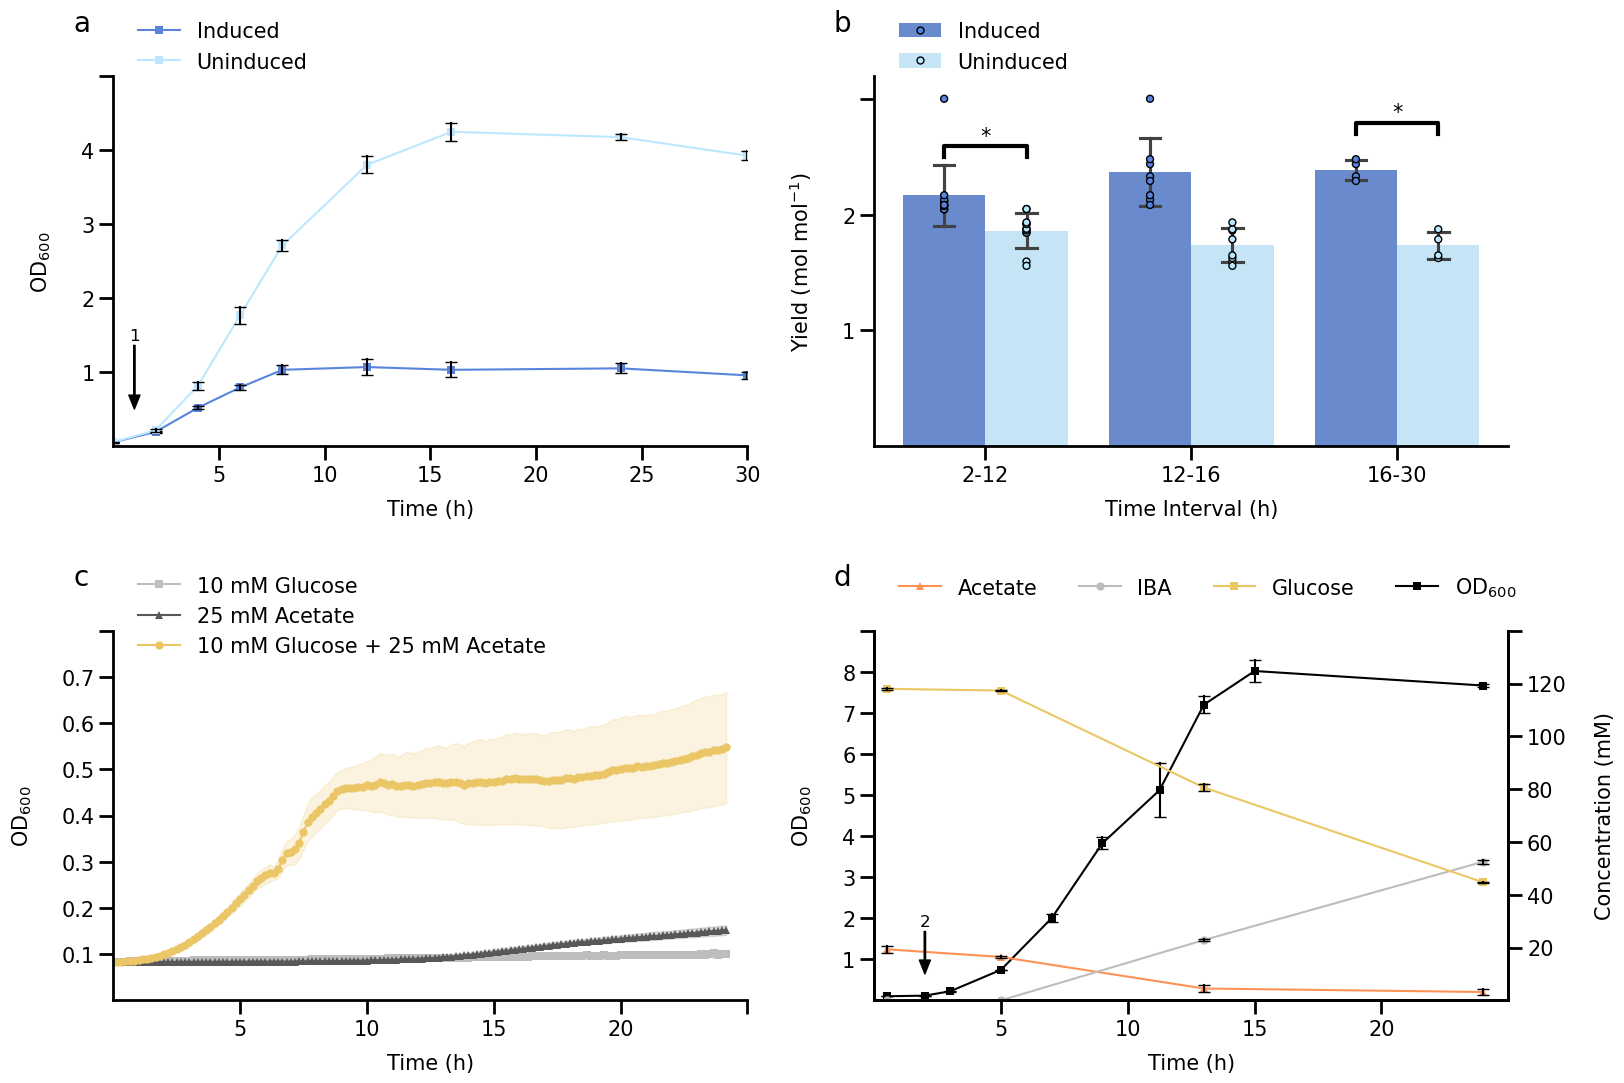

In [497]:
fig = plt.figure(
    figsize=(7.2, 9.7),
    # layout="constrained",
    # dpi=300,
)

gs = fig.add_gridspec(2, 2)

for i, (label, _df, plot_fun) in enumerate(
    zip(
        ["a)", "b)", "c)", "d)"],
        [a_data, b_data, c_data, d_data],
        [figure_a, figure_b, figure_c, figure_d],
    )
):
    ax = fig.add_subplot(gs[i])
    plot_fun(_df, ax)
    ax.set_title(label, fontsize=20, x=-0.05, y=1.1)

plt.subplots_adjust(hspace=0.5)
plt.show()

## Strategy to layout figure
How would you approach laying out the figure?

<details>
<summary>Click to see some hints</summary>
1. Adjust the individual plots to roughly the correct size
2. Adapt the default font sizes for axes labels, ticks, legends, and titles
</details>